# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Read The File

In [3]:
df = pd.read_csv('ecommerce_transaction_data.csv')

In [4]:
df.head()

,invoice_no,invoice_date,stock_code,description,unit_price,quantity,customer_id,province
0,U537226,2015-11-30 08:34:00,22811AP,set of 6 t-lights cacti,44250.0,6,16010.0,DKI Jakarta
1,U537226,2015-11-30 08:34:00,21713AP,citronella candle flowerpot,31500.0,8,16010.0,DKI Jakarta
2,U537226,2015-11-30 08:34:00,22927AP,green giant garden thermometer,89250.0,2,16010.0,DKI Jakarta
3,U537226,2015-11-30 08:34:00,20802AP,small glass sundae dish clear,24750.0,6,16010.0,DKI Jakarta
4,U537226,2015-11-30 08:34:00,22052AP,vintage caravan gift wrap,6300.0,25,16010.0,DKI Jakarta


##### Important note: unit_price are in Rupiah currency

# Cleaning the dataset

## check the unit_price and quantity columns

In [5]:
df[(df['unit_price'] <= 0) | (df['quantity'] <= 0)].head()

,invoice_no,invoice_date,stock_code,description,unit_price,quantity,customer_id,province
50,IC537232,2015-11-30 09:31:00,84840AP,sweetheart carry-all basket,127500.0,-2,12609.0,Jambi
60,UC537234,2015-11-30 09:40:00,22653AP,button box,29250.0,-20,16184.0,DKI Jakarta
1358,UC537251,2015-11-30 10:45:00,22429AP,enamel measuring jug cream,63750.0,-2,NaN,DKI Jakarta
1359,UC537251,2015-11-30 10:45:00,22620AP,4 traditional spinning tops,18750.0,-8,NaN,DKI Jakarta
1360,UC537251,2015-11-30 10:45:00,21890AP,s/6 wooden skittles in cotton bag,44250.0,-2,NaN,DKI Jakarta


Delete the data with <= 0 for unit price and quantity, cause in the transaction data its imposible to have those

In [6]:
df = df[(df['unit_price'] > 0) & (df['quantity'] > 0)]

## check the NAN and data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513614 entries, 0 to 525176
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    513614 non-null  object 
 1   invoice_date  513614 non-null  object 
 2   stock_code    513614 non-null  object 
 3   description   513614 non-null  object 
 4   unit_price    513614 non-null  float64
 5   quantity      513614 non-null  int64  
 6   customer_id   386983 non-null  float64
 7   province      513614 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 35.3+ MB


In [8]:
na_columns = [column for column in df.columns if df[column].isnull().sum() > 0]

NAN percentage in data

In [9]:
print(df[na_columns].isnull().sum() / len(df[na_columns]))

customer_id    0.246549
dtype: float64


fillna in customer_id with 'no customer id'

In [10]:
df['customer_id'] = df['customer_id'].astype(str).apply(lambda x: 'no customer id' if x == 'nan' else x)

Recheck the NAN data again

In [11]:
df['customer_id'].isnull().sum()

0

In [12]:
df[df['customer_id'] == 'no customer id'].head()

,invoice_no,invoice_date,stock_code,description,unit_price,quantity,customer_id,province
31,U537230,2015-11-30 09:20:00,21733AP,red hanging heart t-light holder,44250.0,1,no customer id,DKI Jakarta
76,U537237,2015-11-30 09:58:00,15036AP,assorted colours silk fan,19200.0,2,no customer id,DKI Jakarta
77,U537237,2015-11-30 09:58:00,15056NAP,edwardian parasol natural,190800.0,1,no customer id,DKI Jakarta
78,U537237,2015-11-30 09:58:00,16218AP,cartoon pencil sharpeners,31950.0,1,no customer id,DKI Jakarta
79,U537237,2015-11-30 09:58:00,16238AP,party time pencil erasers,6450.0,5,no customer id,DKI Jakarta


## Define and Group Columns based on data type

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513614 entries, 0 to 525176
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    513614 non-null  object 
 1   invoice_date  513614 non-null  object 
 2   stock_code    513614 non-null  object 
 3   description   513614 non-null  object 
 4   unit_price    513614 non-null  float64
 5   quantity      513614 non-null  int64  
 6   customer_id   513614 non-null  object 
 7   province      513614 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 35.3+ MB


In [14]:
cat_columns = ['invoice_no', 'stock_code', 'description', 'customer_id', 'province']

In [15]:
num_columns = ['unit_price', 'quantity']

In [16]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

In [17]:
df['date'] = df['invoice_date'].dt.date
df['year'] = df['invoice_date'].dt.year
df['day'] = df['invoice_date'].dt.day
df['days_of_week'] = df['invoice_date'].dt.day_name()
df['hour'] = df['invoice_date'].dt.hour
df['sales'] = df['unit_price'] * df['quantity']
df['year_month'] = df['invoice_date'].dt.strftime('%Y-%m')

In [18]:
date_columns_cont = ['date', 'year_month']

In [19]:
date_columns_discrete = ['day', 'days_of_week', 'hour']

# Data Analysis

## Date Columns

### Sales over the year

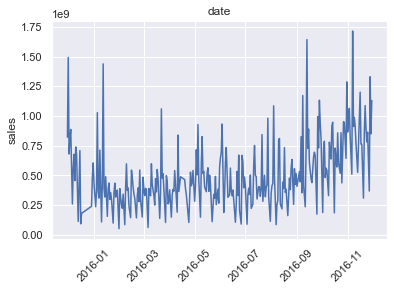

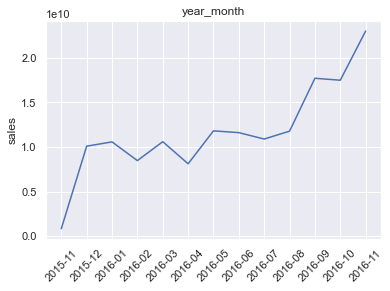

In [74]:
for col in date_columns_cont:
    data_vis = df.groupby([col])['sales'].sum().reset_index()
    plt.figure()
    sns.lineplot(data=data_vis, x=col, y='sales')
    plt.title(col)
    plt.xlabel('')
    plt.xticks(rotation=45)    

##### There are some inclined sales, those are in the desember 2015, september 2016 and in november 2016. The data between those inclined events are tend to be constantly enough, no big inclined and declined.

### Sales within months over the year

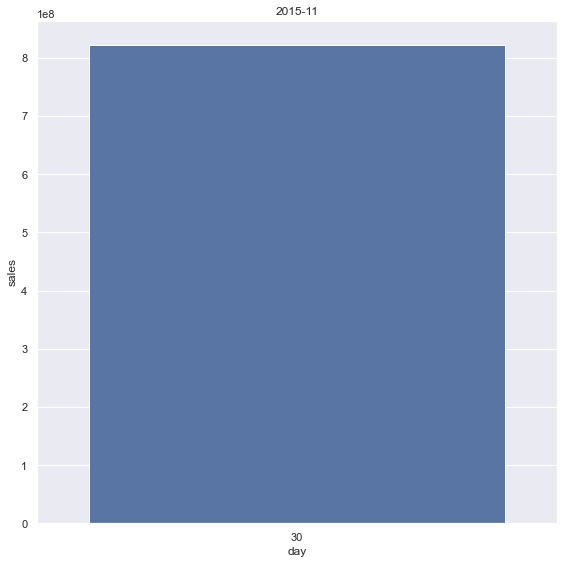

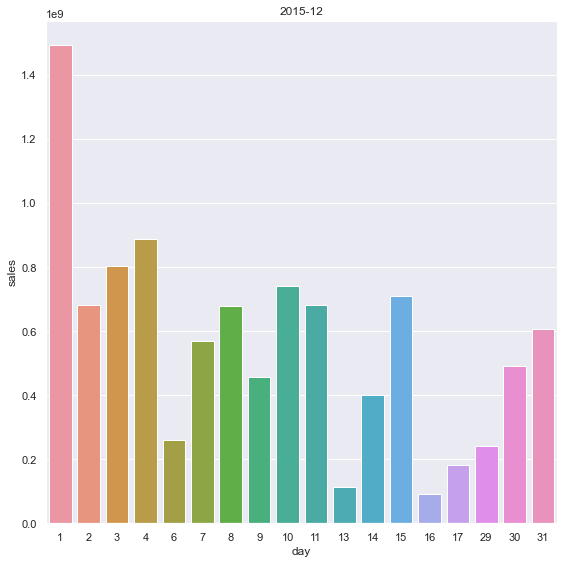

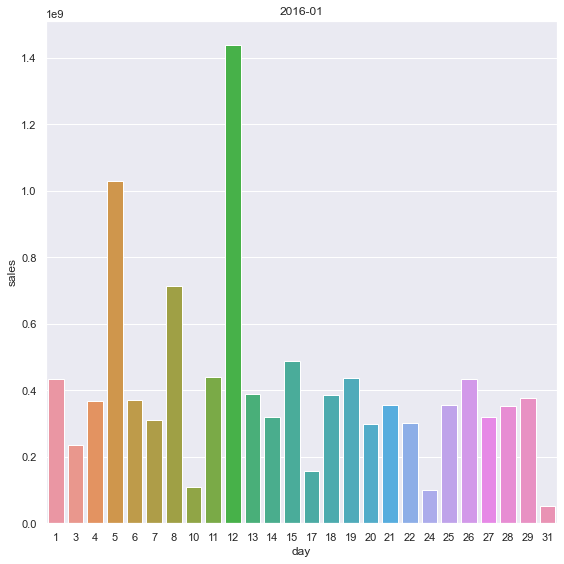

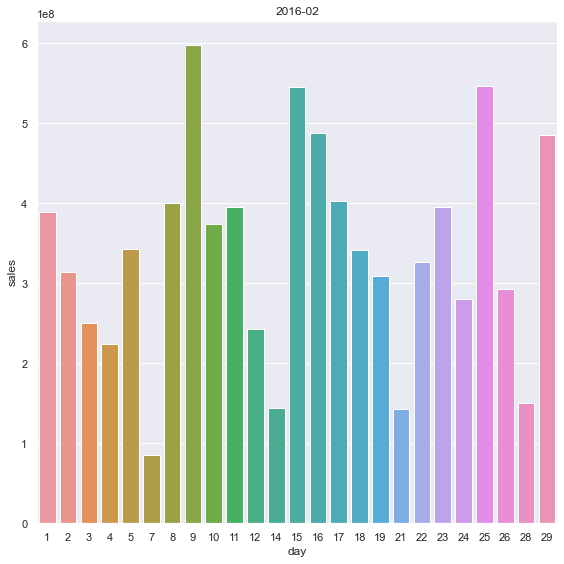

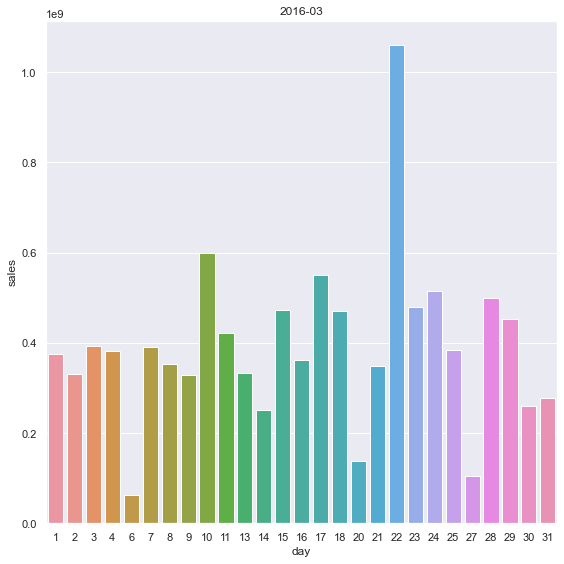

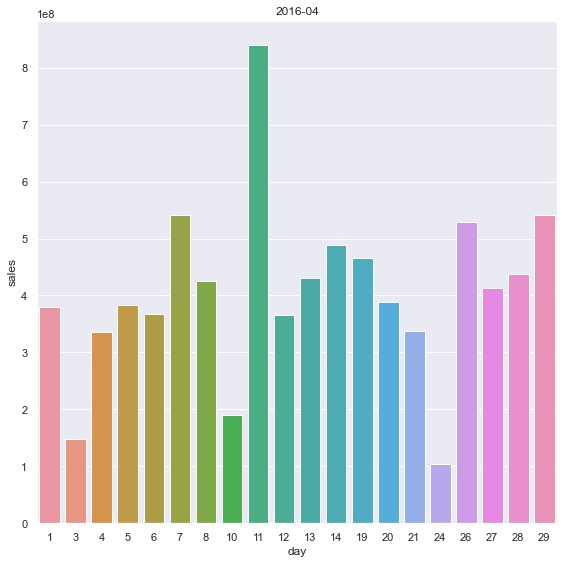

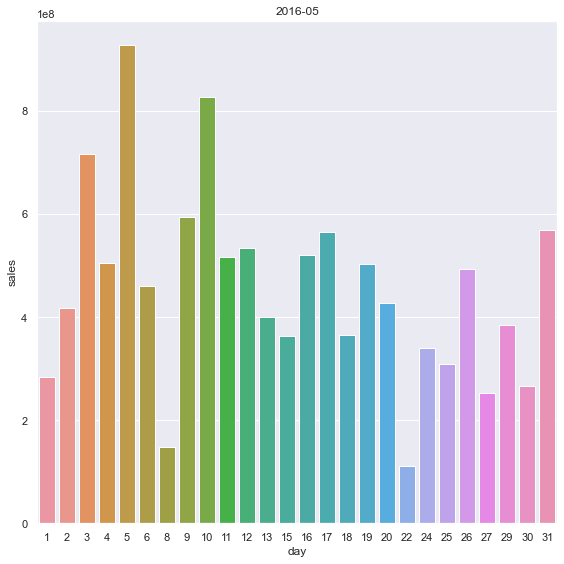

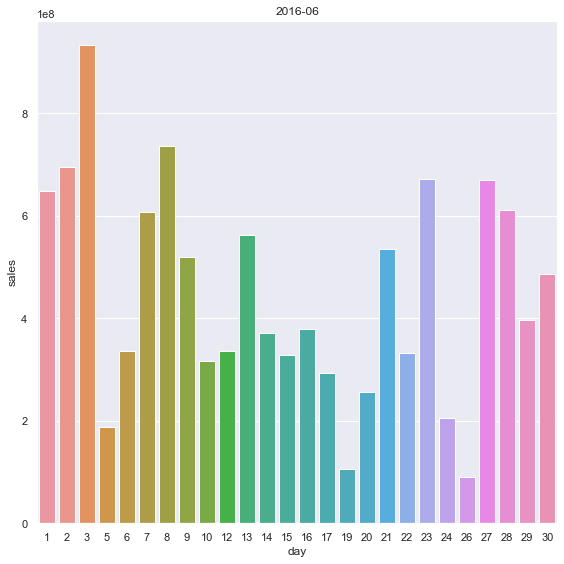

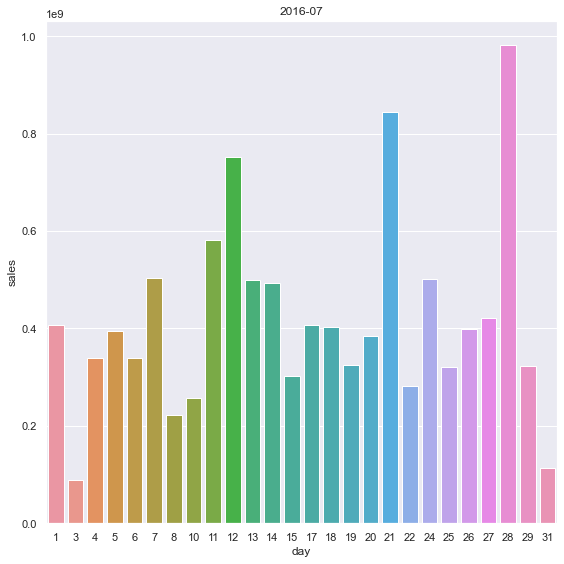

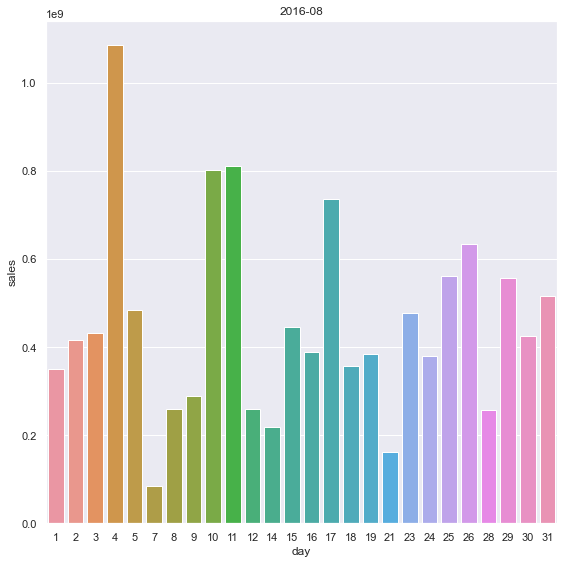

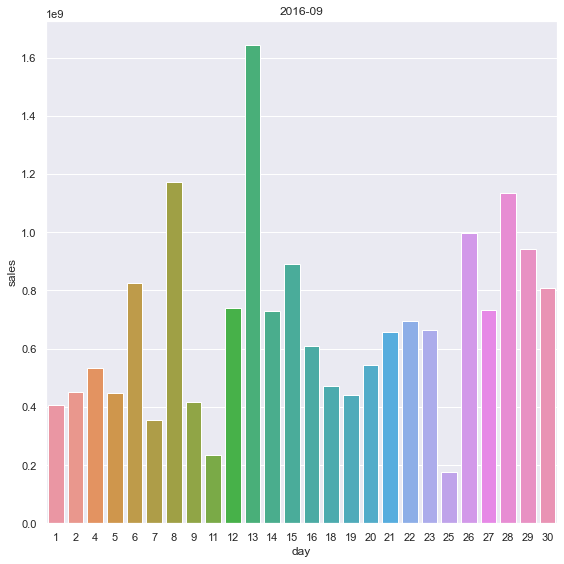

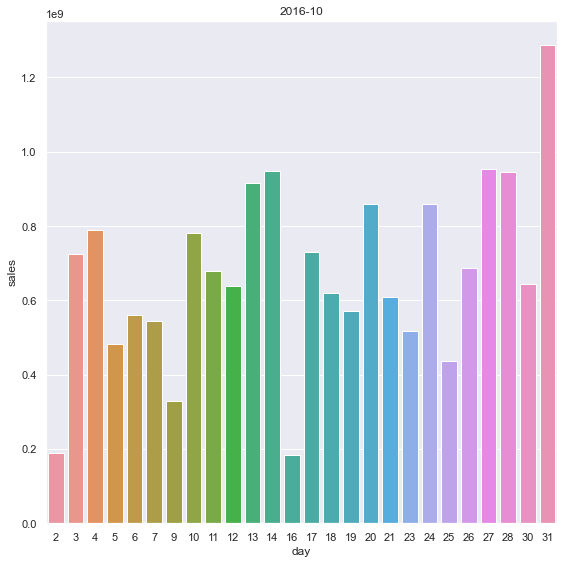

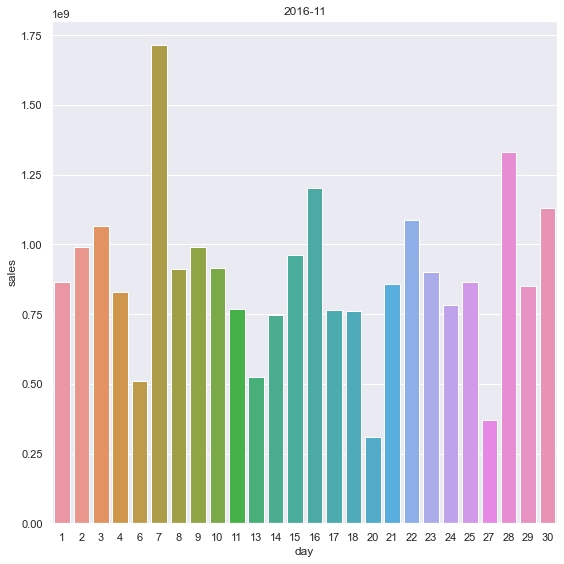

In [78]:
for month in df['year_month'].unique():
    data = df[df['year_month'] == month]
    sales_month = data.groupby(['day'])['sales'].sum().reset_index()
    plt.figure(figsize=(8,8))
    sns.barplot(data=sales_month, x='day', y='sales')
    plt.title(month)
    plt.tight_layout()

##### Here we see the detail within the month inclined sales. In December 2015, the inclined sales happend in the first day of the first week of the month and in December 2016 the inclined sales happend in seventh day of the first week of the month, this maybe happened cause customer shopping in case prepare for their holiday, or also can be there are year sale event in the e-commerce platform. In september 2016, the inclined sales happend in sixth day of the second week of the month.

### Sales trends in days and hours frequency

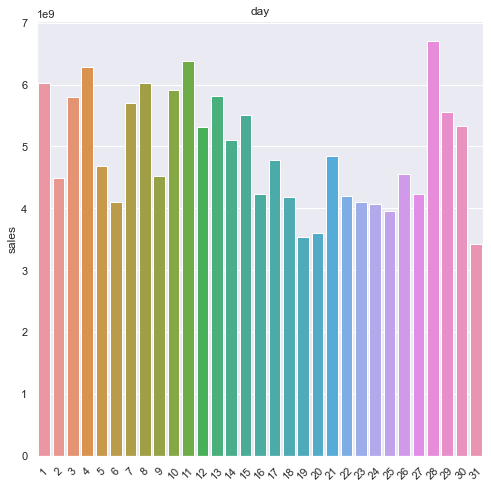

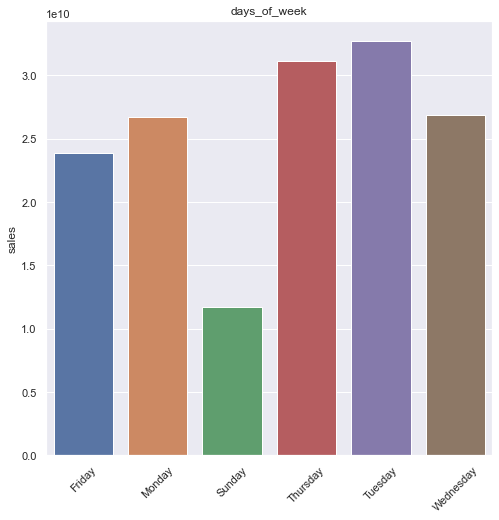

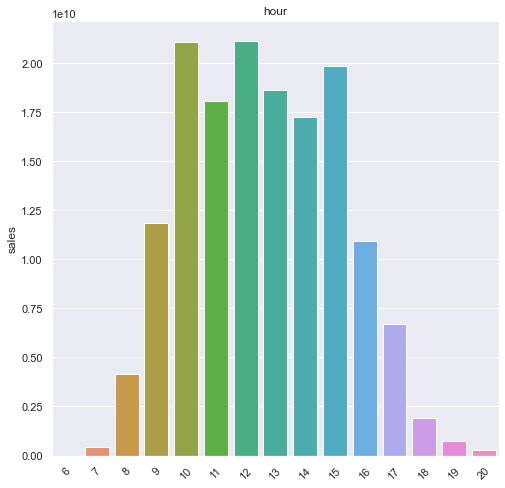

In [77]:
for col in date_columns_discrete:
    data_vis = df.groupby([col])['sales'].sum().reset_index()
    plt.figure(figsize=(8,8))
    sns.barplot(data=data_vis, x=col, y='sales')
    plt.title(col)
    plt.xlabel('')
    plt.xticks(rotation=45)  

##### surprisingly sunday is the least sales, with tuesday and thursday are the most sales in weeks.

##### the trends for the customers to do the transaction are in operational hour which is 9 AM to 16 PM with 10 AM and 12 PM are the most sales happend and followed by 15 PM 

## Total Sales in Categorical Columns

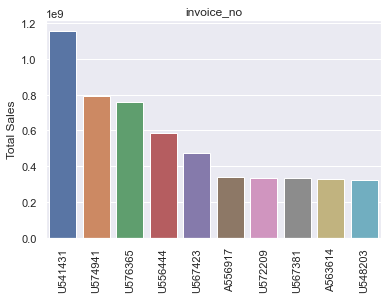

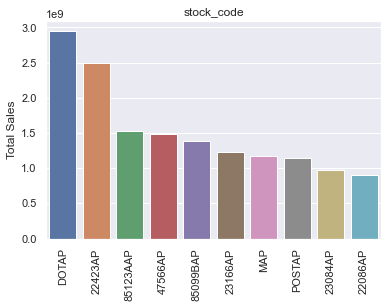

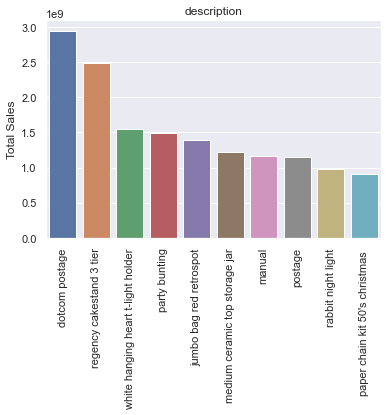

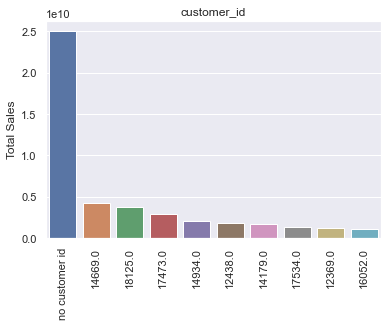

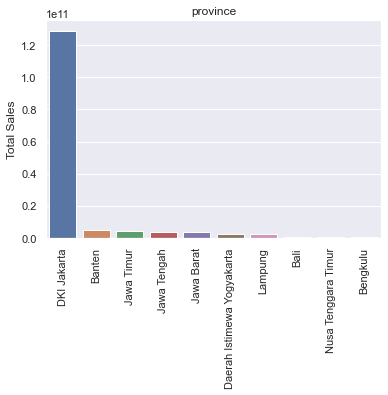

In [69]:
for col in cat_columns:
    data_vis = df.groupby([col])['sales'].sum().reset_index().sort_values(by='sales', ascending=False)
    limit_data_vis =data_vis[0:10]
    plt.figure()
    sns.barplot(data=limit_data_vis, x=col, y='sales')
    plt.ylabel('Total Sales')
    plt.xlabel('')
    plt.title(col)
    plt.xticks(rotation=90)

##### The sales record in one transaction is invoice with no U541431 with nearly 1.2 milion Rupiah in one transaction

##### Top Products are dotcom postage, regency cakestand 3 tier, white hanging heart t--light holder with dotcom postage sales around 2.9 Millions Rupiah

##### The top location of sales transaction is DKI Jakarta.

##### we cant see the top customer cause in the dataset, there are too much 'no customer id'. if we delete it at first time, so we lose too much precious data

## Total Transaction within Categorical Columns

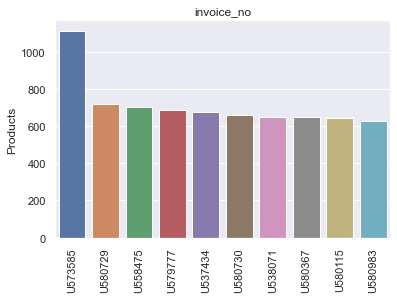

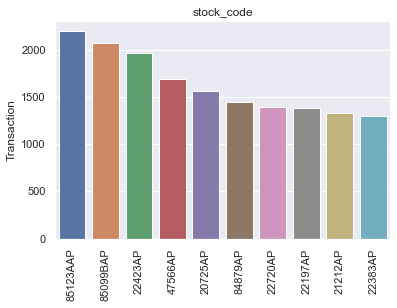

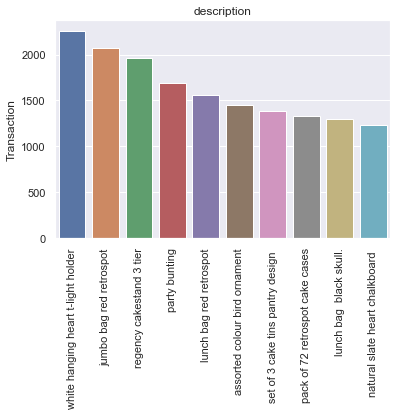

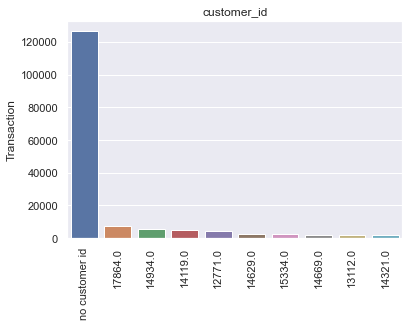

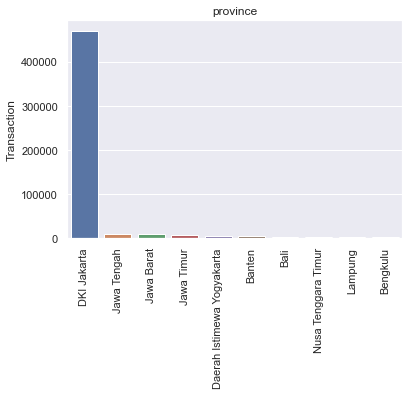

In [76]:
for col in cat_columns:
    data_vis = df.groupby([col])['sales'].count().reset_index().sort_values(by='sales', ascending=False)
    limit_data_vis =data_vis[0:10]
    plt.figure()
    sns.barplot(data=limit_data_vis, x=col, y='sales')
    plt.xlabel('')
    if col == 'invoice_no':
        plt.ylabel('Products')
    else:
        plt.ylabel('Transaction')
    plt.title(col)
    plt.xticks(rotation=90)

##### Invoice with no U573585 is transaction with the most variety products within one transaction

##### Products with more than 2000 transaction are white hanging heart t-light holder and Jumbo bag red retrosport

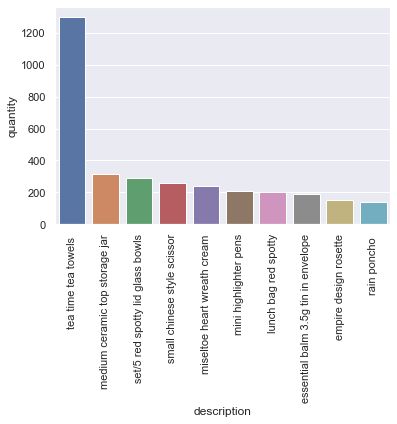

In [61]:
data_vis = df.groupby(['description'])['quantity'].mean().reset_index().sort_values(by='quantity', ascending=False)
limit_data_vis = data_vis[0:10]
plt.figure()
sns.barplot(data=limit_data_vis, x='description', y='quantity')
plt.xticks(rotation=90)
sns.set()

##### The top quantity of product in one single transaction is tea time tea towels. and from the plot we can see that none of the top quantity of the products in one transaction in top sales in products, meanwhile top transaction in products are more related to total sales in products

## Average Sales every transaction in Categorical Columns

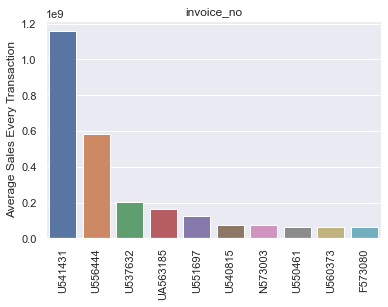

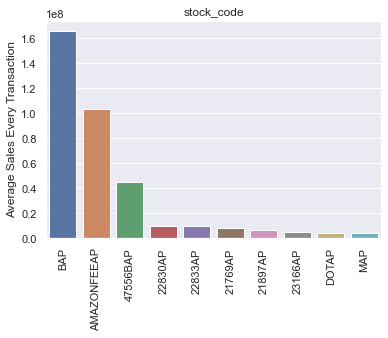

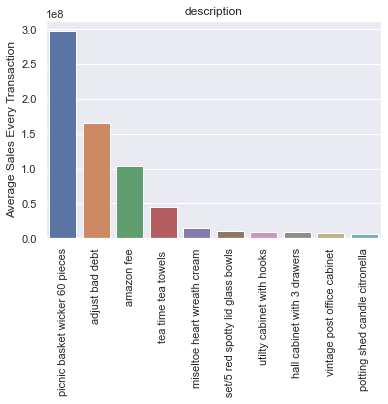

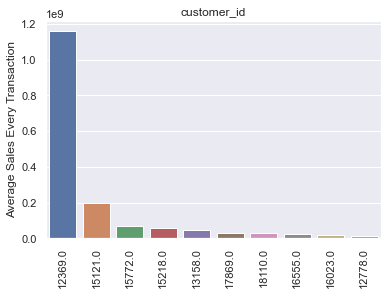

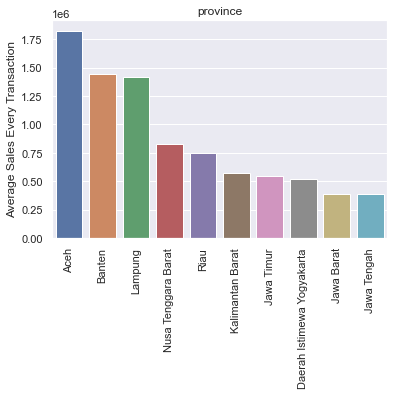

In [77]:
for col in cat_columns:
    data_vis = df.groupby([col])['sales'].mean().reset_index().sort_values(by='sales', ascending=False)
    limit_data_vis =data_vis[0:10]
    plt.figure()
    sns.barplot(data=limit_data_vis, x=col, y='sales')
    plt.xlabel('')
    plt.ylabel('Average Sales Every Transaction')
    plt.title(col)
    plt.xticks(rotation=90)

##### The top location for average sales every transaction are dominant by the location outside DKI Jakarta (assume HQ in Jakarta), this is because the delivery cost for far location tend to more expensive, so customers on those location tend to do big transaction all at once.

## Sales products in each province

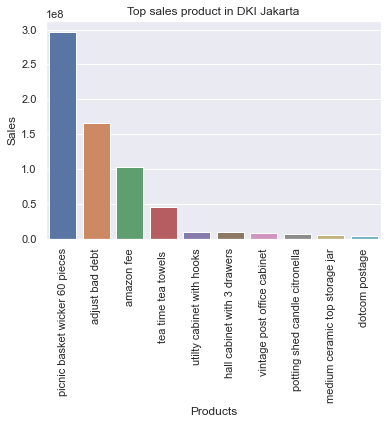

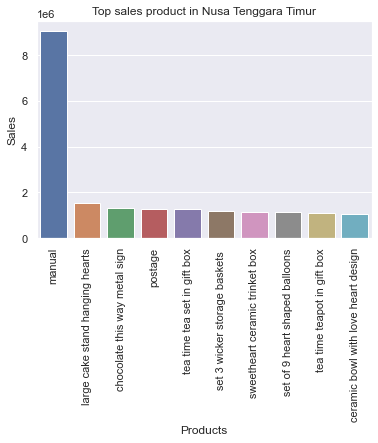

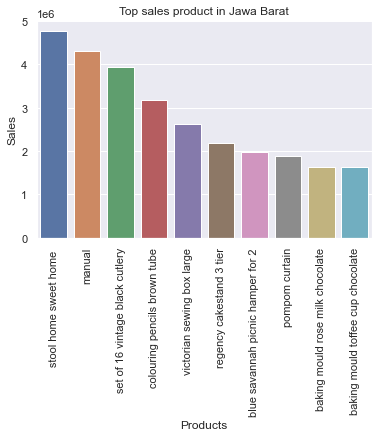

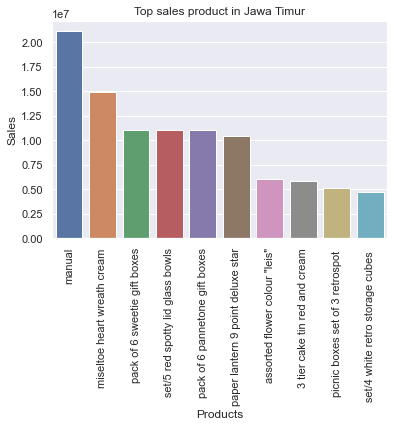

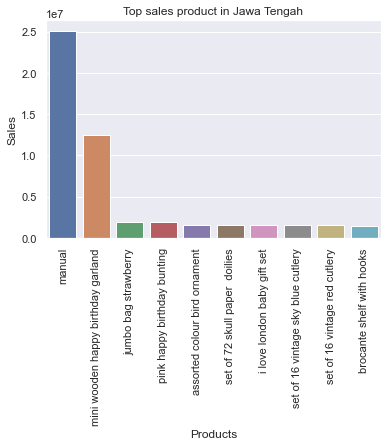

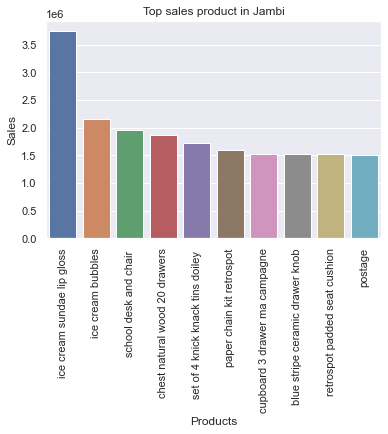

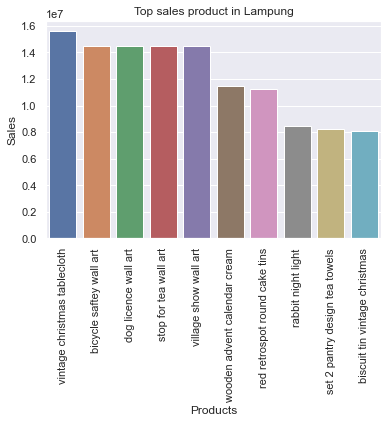

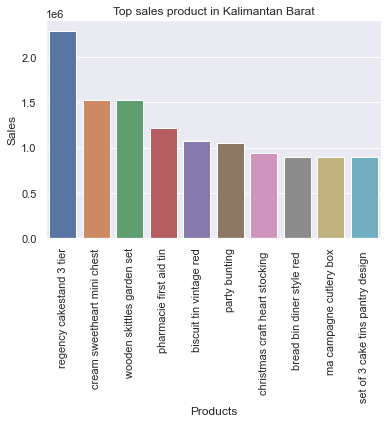

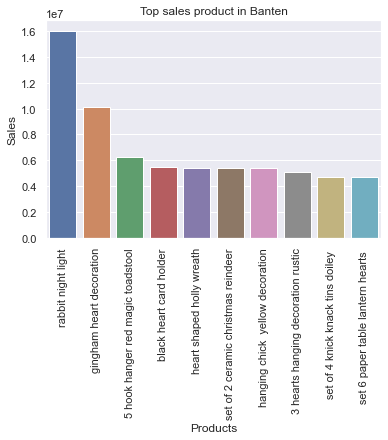

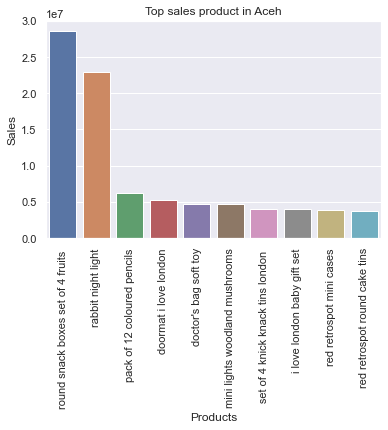

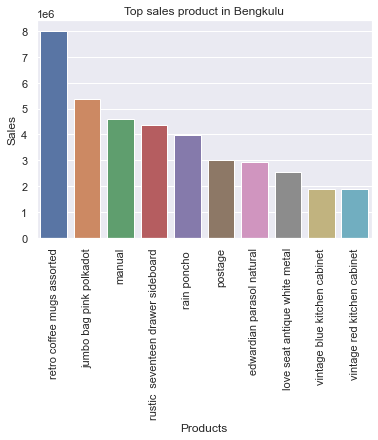

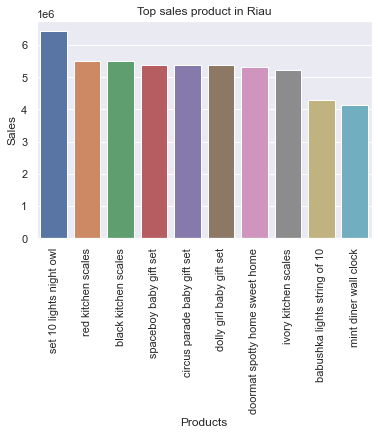

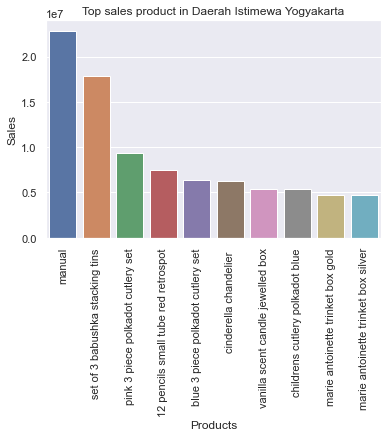

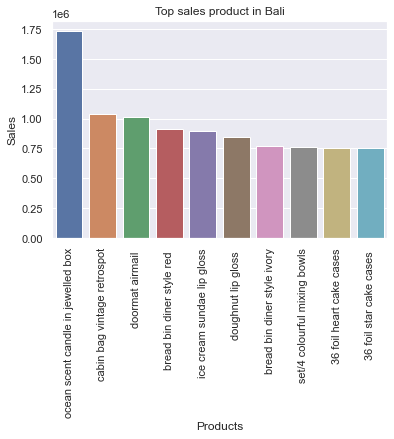

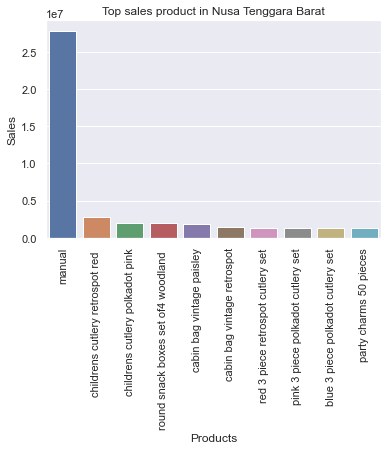

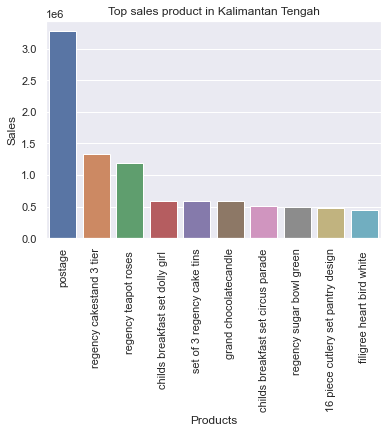

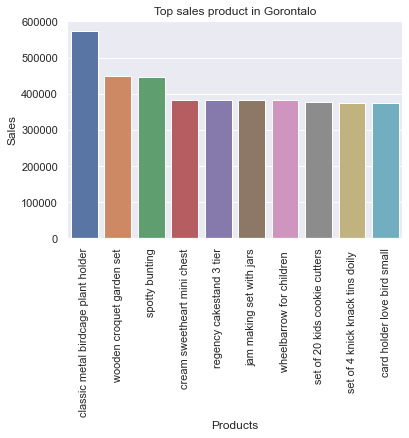

In [35]:
for province in df.province.unique():
    data_vis = df.groupby(['description', 'province'])['sales'].mean().reset_index().sort_values(by='sales', ascending=False)
    top_data_vis = data_vis[data_vis['province'] == province][0:10]
    plt.figure()
    sns.barplot(data=top_data_vis, x='description', y='sales')
    plt.xticks(rotation=90)
    plt.title('Top sales product in ' + province)
    plt.xlabel('Products')
    plt.ylabel('Sales')
    sns.set()